# Tune of SKOS relation classifier with sentence examples
Sentences catched from Leipzig corpus[https://wortschatz.uni-leipzig.de/en/download] and vectorized by Doc2Vec.

In [33]:
import pandas as pd
import numpy as np

data = pd.read_csv('DET_SKOS_with_text_woheader.csv', sep=',', error_bad_lines=True, header=None)

sample_size = data.shape[0]
print(data.shape[1])
print(data.shape[0])
#print(labels)



1826
25926


c:\work\2023\venv\imgtest\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1816,1825) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
data[1806] #1-broader

0        1
1        1
2        0
3        0
4        0
        ..
25921    0
25922    0
25923    0
25924    0
25925    0
Name: 1806, Length: 25926, dtype: int64

In [37]:
X = data.iloc[:,3:1805].astype(float)

In [57]:
Y =  data[1806].astype(int)

In [39]:
import tensorflow as tf

In [58]:
Y_cat=tf.keras.utils.to_categorical(Y, num_classes=None, dtype="int")

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=50)

In [68]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(1802,), name='digits')

x = layers.Dense(1000, activation='softmax', name='dense_1')(inputs)
#y = layers.Dense(650, activation='softmax', name='dense_2')(x)
#z = layers.Dense(350, activation='softmax', name='dense_3')(y)
z1 = layers.Dense(150, activation='softmax', name='dense_4')(x)
#x = layers.Dense(50, activation='relu', name='dense_5')(x)
outputs = layers.Dense(2, activation='softmax', name='predictions')(z1)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),#RMSprop(),
            loss='binary_crossentropy',
            metrics=['accuracy']
            )

tf.keras.callbacks.ModelCheckpoint(
    "cnn.hdf5", monitor='val_loss', verbose=1, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch'
    
)

with tf.device('/gpu:0'):
    history=model.fit(X_train, Y_train, batch_size=5, epochs=20, verbose=1,shuffle=1, validation_data=(X_test, Y_test))

print('\nhistory dict:', history.history)

print('\n# Оцениваем на тестовых данных')
results = model.evaluate(X_test, Y_test, batch_size=7)
print('test loss, test acc:', results)




Epoch 1/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.6440 - accuracy: 0.7238 - val_loss: 0.6139 - val_accuracy: 0.7200
Epoch 2/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.5978 - accuracy: 0.7238 - val_loss: 0.5910 - val_accuracy: 0.7200
Epoch 3/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.5819 - accuracy: 0.7238 - val_loss: 0.5800 - val_accuracy: 0.7200
Epoch 4/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.5695 - accuracy: 0.7238 - val_loss: 0.5662 - val_accuracy: 0.7200
Epoch 5/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.5523 - accuracy: 0.7238 - val_loss: 0.5474 - val_accuracy: 0.7200
Epoch 6/20
3889/3889 [==============================] - 27s 7ms/step - loss: 0.5322 - accuracy: 0.7238 - val_loss: 0.5276 - val_accuracy: 0.7200
Epoch 7/20
3889/3889 [==============================] - 26s 7ms/step - loss: 0.5126 - accuracy: 0.7238 - val_loss: 0.5089 - val_ac

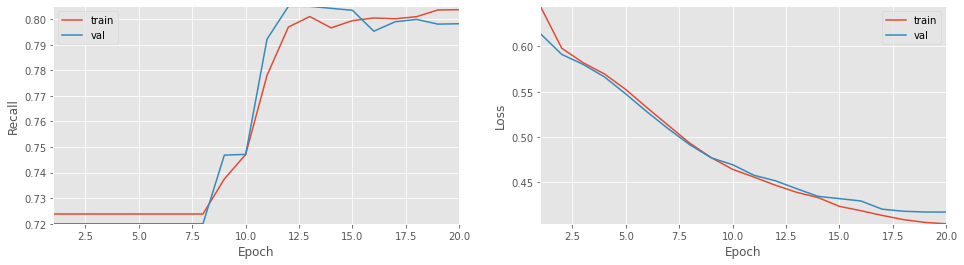

In [78]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 4))
    ax1, ax2 = axes.ravel()

    plot_metrix(ax1, history.history['accuracy'], history.history['val_accuracy'], 'Recall')
    plot_metrix(ax2, history.history['loss'], history.history['val_loss'], 'Loss')

    plt.show()


plot_history(history)

In [80]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 1802)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1803000   
_________________________________________________________________
dense_4 (Dense)              (None, 150)               150150    
_________________________________________________________________
predictions (Dense)          (None, 2)                 302       
Total params: 1,953,452
Trainable params: 1,953,452
Non-trainable params: 0
_________________________________________________________________
